<a href="https://colab.research.google.com/github/MahmoudFarouq/faceVerification/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
from skimage import color


from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
!wget https://github.com/MahmoudFarouq/faceVerification/raw/master/dataObject.pkl

--2018-12-26 14:57:00--  https://github.com/MahmoudFarouq/faceVerification/raw/master/dataObject.pkl
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MahmoudFarouq/faceVerification/master/dataObject.pkl [following]
--2018-12-26 14:57:00--  https://raw.githubusercontent.com/MahmoudFarouq/faceVerification/master/dataObject.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27648166 (26M) [application/octet-stream]
Saving to: ‘dataObject.pkl’

dataObject.pkl      100%[===================>]  26.37M   111MB/s    in 0.2s    

2018-12-26 14:57:03 (111 MB/s) - ‘dataObject.pkl’ saved [2764

In [0]:
with open("dataObject.pkl", 'rb') as dataFile:
  X = pickle.load(dataFile)

In [4]:
X.shape

(1000, 48, 48, 3)

In [0]:
y = [
    np.full((250, 1), 0), 
    np.full((250, 1), 1), 
    np.full((250, 1), 2), 
    np.full((250, 1), 3)
]
y = np.vstack(y)

# onehot encoding
y_encoder = OneHotEncoder(sparse=False, categories='auto')
y = y_encoder.fit_transform(y)

In [6]:
y.shape

(1000, 4)

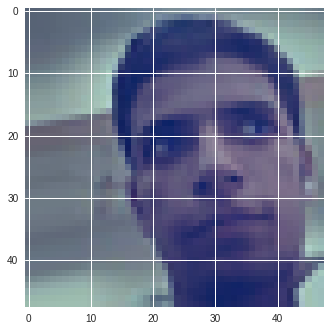

In [9]:
plt.imshow( X[750].reshape(48, 48, 3) )

In [0]:
X = color.rgb2gray( X.reshape(-1, 48, 48, 3) )
X = X.reshape(1000, -1)
X /= 255

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
n = X_train[0].shape[0] # num of features -> 48 * 48 * 3 in this case
drop = 0.2

model = Sequential()

model.add(Dense(1000, activation="relu", input_shape=(n,)))
model.add(Dropout(drop))
model.add(Dense(800, activation="relu"))
model.add(Dropout(drop))
model.add(Dense(600, activation="relu"))
model.add(Dropout(drop))
model.add(Dense(500, activation="relu"))
model.add(Dropout(drop))
model.add(Dense(400, activation="relu"))
model.add(Dropout(drop))
model.add(Dense(400, activation="relu"))
model.add(Dropout(drop))
model.add(Dense(300, activation="relu"))
model.add(Dropout(drop))
model.add(Dense(300, activation="relu"))
model.add(Dropout(drop))
model.add(Dense(200, activation="relu"))
model.add(Dropout(drop))
model.add(Dense(200, activation="relu"))
model.add(Dropout(drop))
model.add(Dense(150, activation="relu"))
model.add(Dropout(drop))
model.add(Dense(150, activation="relu"))
model.add(Dropout(drop))
model.add(Dense(100, activation="relu"))
model.add(Dropout(drop))
model.add(Dense(50 , activation="relu"))
model.add(Dropout(drop))
model.add(Dense(20 , activation="relu"))
model.add(Dropout(drop))
model.add(Dense(4  , activation="softmax"))

In [0]:
opt = Adam(lr=0.0001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [54]:
model.fit(
    X_train, 
    y_train,
    validation_data=(X_test,y_test),
    validation_split=0.8,
    epochs=1000,
    shuffle=True,
    batch_size=128,
    verbose=1
)

Train on 800 samples, validate on 200 samples
Epoch 1/1000
800/800 [==============================] - 4s 5ms/step - loss: 1.3863 - acc: 0.2412 - val_loss: 1.3864 - val_acc: 0.2450
Epoch 2/1000
800/800 [==============================] - 0s 266us/step - loss: 1.3863 - acc: 0.2412 - val_loss: 1.3864 - val_acc: 0.2450
Epoch 3/1000
800/800 [==============================] - 0s 259us/step - loss: 1.3863 - acc: 0.2313 - val_loss: 1.3865 - val_acc: 0.2450
Epoch 4/1000
800/800 [==============================] - 0s 248us/step - loss: 1.3862 - acc: 0.2475 - val_loss: 1.3866 - val_acc: 0.2450
Epoch 5/1000
800/800 [==============================] - 0s 258us/step - loss: 1.3862 - acc: 0.2550 - val_loss: 1.3866 - val_acc: 0.2450
Epoch 6/1000
800/800 [==============================] - 0s 256us/step - loss: 1.3863 - acc: 0.2500 - val_loss: 1.3866 - val_acc: 0.2450
Epoch 7/1000
800/800 [==============================] - 0s 269us/step - loss: 1.3860 - acc: 0.2538 - val_loss: 1.3866 - val_acc: 0.2450
Epoc

In [0]:
names = ['karim', 'omar', 'amr', 'farouq']

In [55]:
model.evaluate(X_test, y_test)

200/200 [==============================] - 0s 171us/step


[2.6463146209716797, 0.505]

'omar'

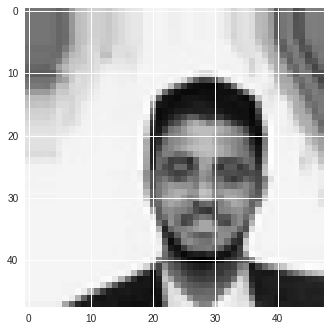

In [57]:
index = np.random.randint(0, 800)
plt.imshow(X_train[index].reshape(48, 48), cmap='gray')
names[np.argmax(model.predict(X_train[index].reshape(1, -1)))]

'amr'

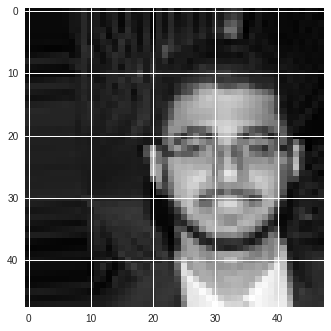

In [45]:
index = np.random.randint(0, 200)
plt.imshow(X_test[index].reshape(48, 48), cmap='gray')
names[np.argmax(model.predict(X_train[index].reshape(1, -1)))]